Customer segmentation :Daniel


Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

Content
https://www.kaggle.com/fabiendaniel/customer-segmentation/data

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

https://www.kaggle.com/fabiendaniel/customer-segmentation/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/home/direwolf/Downloads/E_Commerce_Data.xls')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
InvoiceNo      65535 non-null object
StockCode      65535 non-null object
Description    65369 non-null object
Quantity       65535 non-null int64
InvoiceDate    65535 non-null object
UnitPrice      65535 non-null float64
CustomerID     40218 non-null float64
Country        65535 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,65535.000000,65535.000000,40218.000000
mean,8.363119,5.856143,15384.033517
std,413.694482,145.755953,1766.863499
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14001.000000
50%,2.000000,2.510000,15358.000000
75%,8.000000,4.240000,17019.000000
max,74215.000000,16888.020000,18283.000000


In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
InvoiceNo      65535 non-null object
StockCode      65535 non-null object
Description    65369 non-null object
Quantity       65535 non-null int64
InvoiceDate    65535 non-null datetime64[ns]
UnitPrice      65535 non-null float64
CustomerID     40218 non-null float64
Country        65535 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.0+ MB


In [9]:
data[data.isnull().any(axis=1)].shape

(25317, 8)

In [10]:
data_new = data.dropna()

In [11]:
data_new.shape

(40218, 8)

In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40218 entries, 0 to 65101
Data columns (total 8 columns):
InvoiceNo      40218 non-null object
StockCode      40218 non-null object
Description    40218 non-null object
Quantity       40218 non-null int64
InvoiceDate    40218 non-null datetime64[ns]
UnitPrice      40218 non-null float64
CustomerID     40218 non-null float64
Country        40218 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.8+ MB


In [13]:
data_new['CustomerID'] = data_new['CustomerID'].astype('int64')

/home/direwolf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40218 entries, 0 to 65101
Data columns (total 8 columns):
InvoiceNo      40218 non-null object
StockCode      40218 non-null object
Description    40218 non-null object
Quantity       40218 non-null int64
InvoiceDate    40218 non-null datetime64[ns]
UnitPrice      40218 non-null float64
CustomerID     40218 non-null int64
Country        40218 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.8+ MB


In [15]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,65535.000000,65535.000000,40218.000000
mean,8.363119,5.856143,15384.033517
std,413.694482,145.755953,1766.863499
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14001.000000
50%,2.000000,2.510000,15358.000000
75%,8.000000,4.240000,17019.000000
max,74215.000000,16888.020000,18283.000000


In [16]:
data_new = data_new[data_new['Quantity'] > 0]

In [17]:
data_new.describe()

,Quantity,UnitPrice,CustomerID
count,39190.000000,39190.000000,39190.000000
mean,14.615642,3.127008,15393.601531
std,378.030232,5.251719,1769.083012
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14030.000000
50%,5.000000,1.950000,15373.000000
75%,12.000000,3.750000,17059.000000
max,74215.000000,295.000000,18283.000000


In [18]:
data_new['AmountSpent'] = data_new['Quantity'] * data_new['UnitPrice']

In [19]:
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
datetime = pd.to_datetime(data_new['InvoiceDate'])

data_new['Year'] = datetime.dt.year
np.unique(data_new['Year'])

array([2010, 2011])

In [22]:
data_new['Month'] =datetime.dt.month
np.unique(data_new['Month'])

array([ 1, 12])

In [23]:
data_new['Day'] = datetime.dt.day
np.unique(data_new['Day'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [24]:
data_new['Hour'] = datetime.dt.hour
np.unique(data_new['Hour'])

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [25]:
data_new['DayOfWeek'] = datetime.dt.dayofweek
np.unique(data_new['DayOfWeek'])

array([0, 1, 2, 3, 4, 6])

In [26]:
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year,Month,Day,Hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2


In [27]:
data_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,31
2,12348,Finland,17
3,12356,Portugal,36
4,12359,Cyprus,16


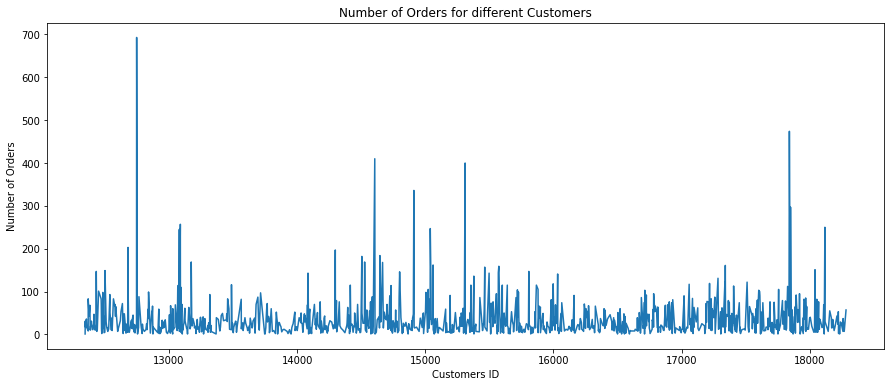

In [28]:
orders = data_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders['CustomerID'], orders['InvoiceNo'])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [29]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
91,12748,United Kingdom,693
1043,17841,United Kingdom,474
416,14606,United Kingdom,410
550,15311,United Kingdom,400
478,14911,EIRE,336


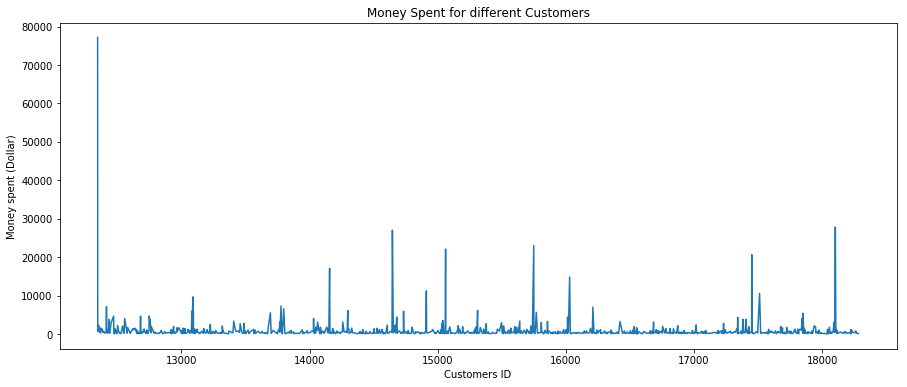

In [30]:
money_spent = data_new.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent['CustomerID'], money_spent['AmountSpent'])
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [31]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='AmountSpent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,AmountSpent
0,12346,United Kingdom,77183.60
1111,18102,United Kingdom,27834.61
423,14646,Netherlands,27008.26
639,15749,United Kingdom,22998.40
505,15061,United Kingdom,22107.61


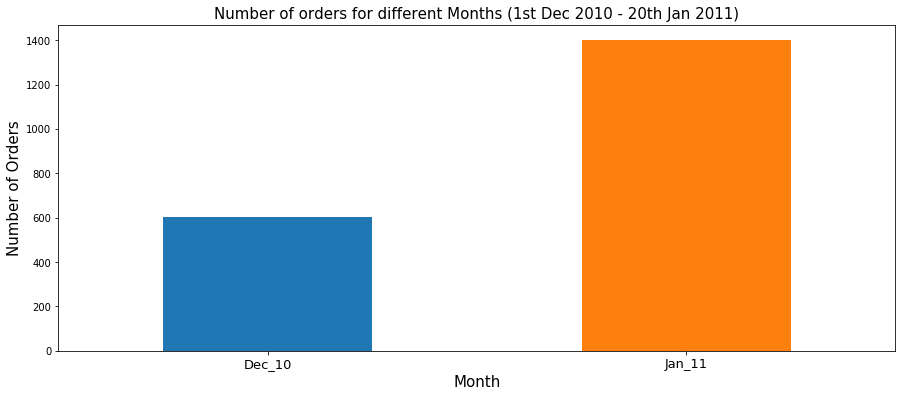

In [32]:
ax = data_new.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 20th Jan 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11'), rotation='horizontal', fontsize=13)
plt.show()

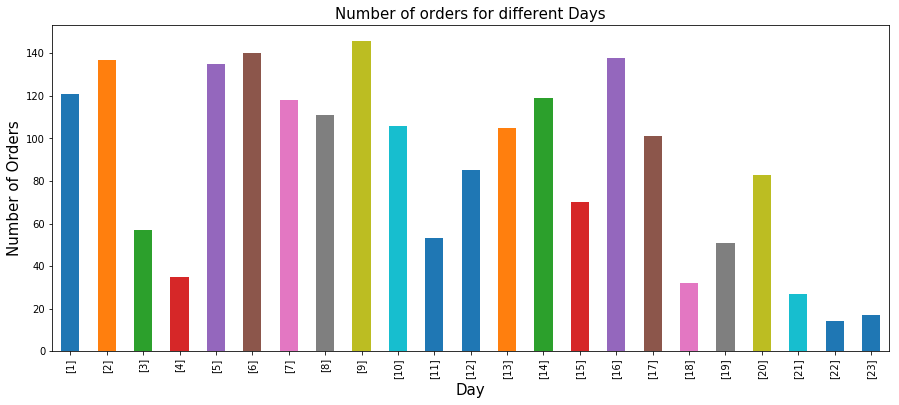

In [33]:
ax = data_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
#ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()


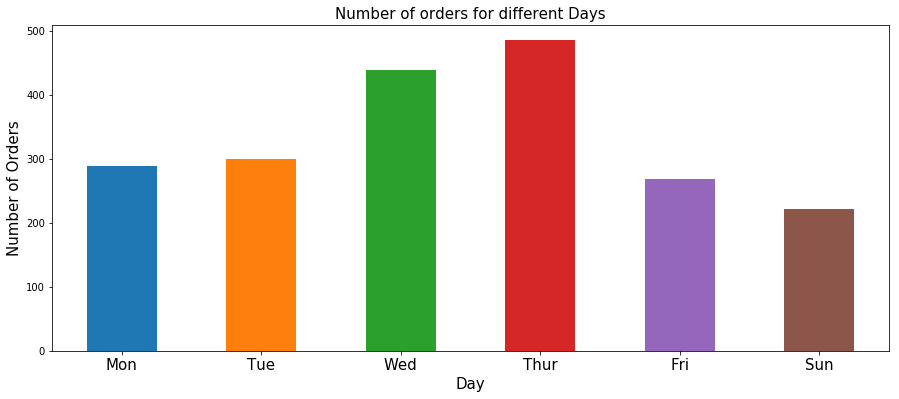

In [34]:
ax = data_new.groupby('InvoiceNo')['DayOfWeek'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [35]:
data_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()


[7]       3
[8]      36
[9]     147
[10]    250
[11]    260
[12]    326
[13]    281
[14]    221
[15]    247
[16]    136
[17]     60
[18]     21
[19]     12
Name: Hour, dtype: int64

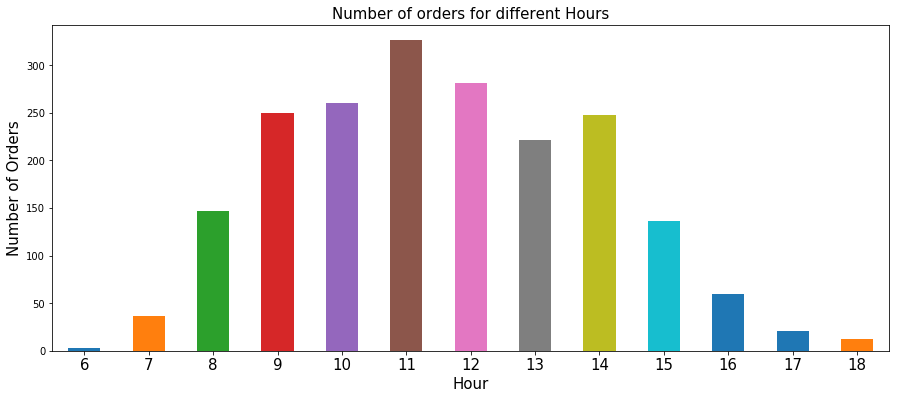

In [38]:
ax = data_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

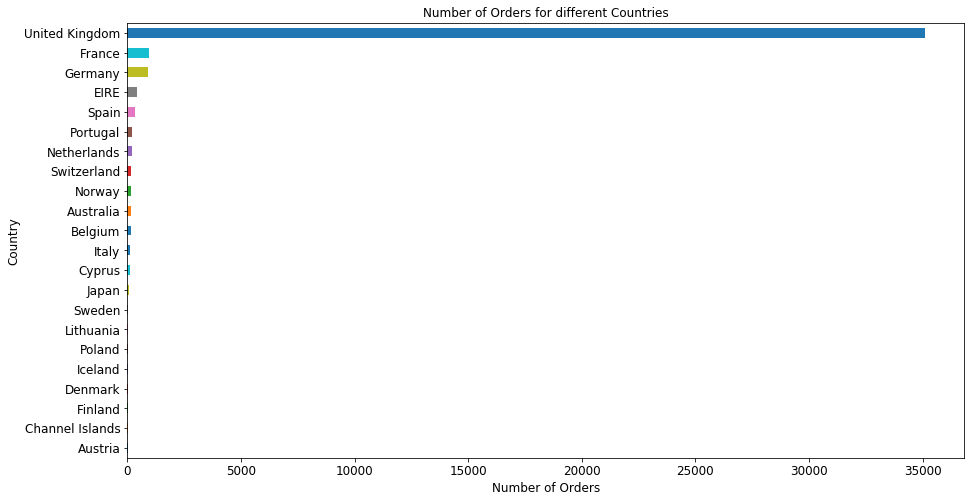

In [40]:
group_country_orders = data_new.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

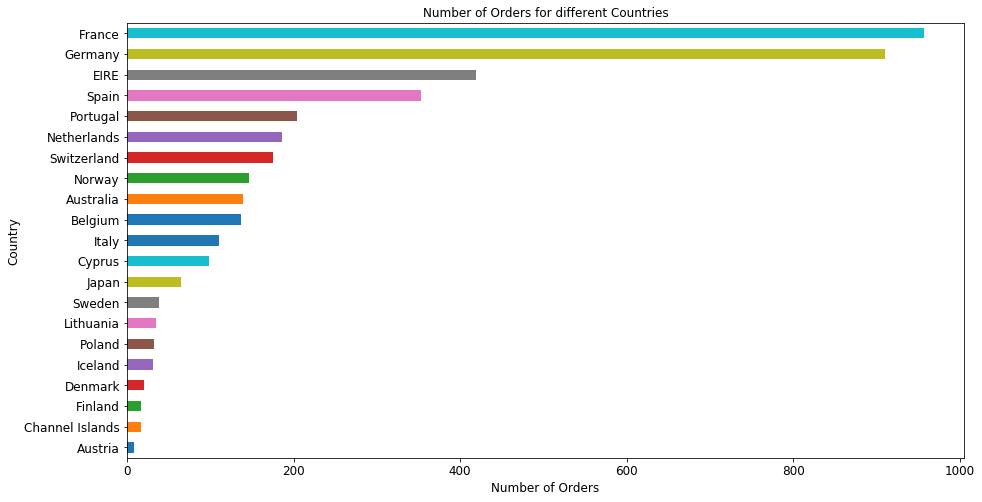

In [41]:
group_country_orders = data_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

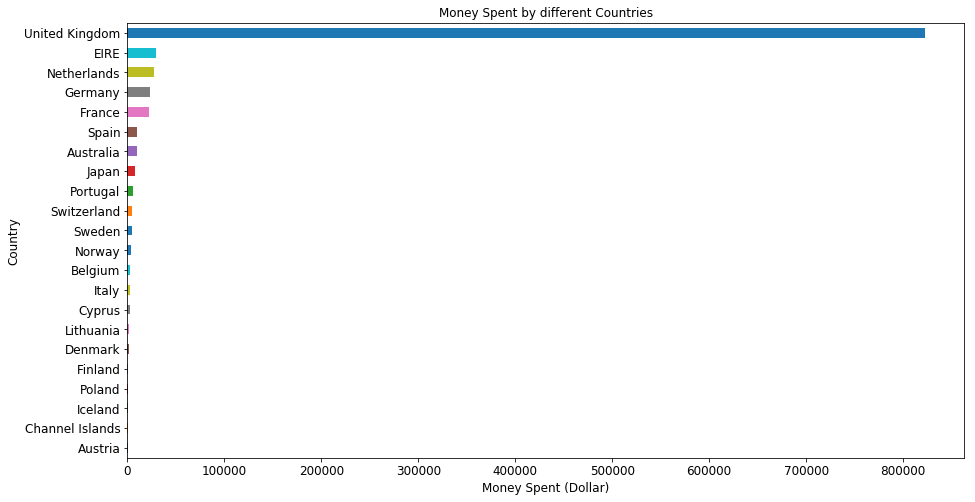

In [42]:
group_country_amount_spent = data_new.groupby('Country')['AmountSpent'].sum().sort_values()
# del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()


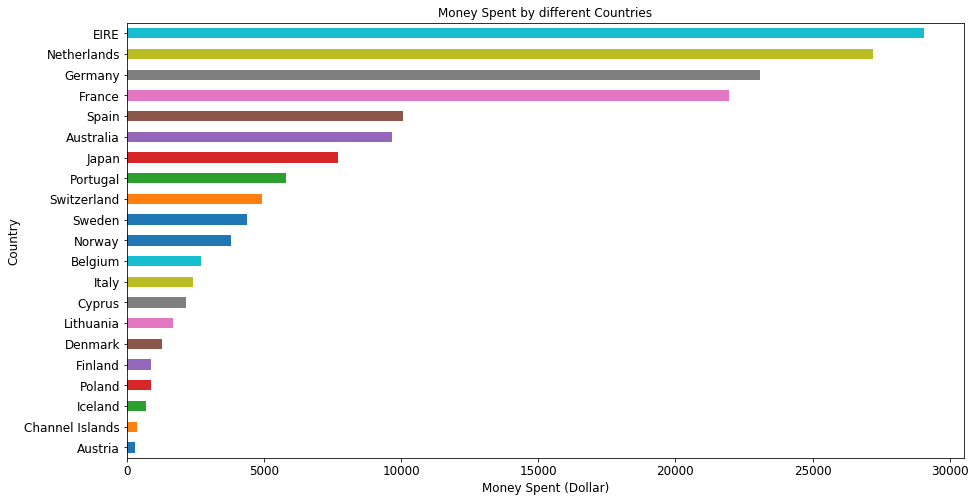

In [45]:
group_country_amount_spent = data_new.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()
